##  Section 3. Gradient Descent 방법

## 문제 1 Gradient Descent을 활용한 Linear Regression

* **Gradient Descent**을 이용해 아래 데이터를 linear regression 해주세요. <br>

###  Gradient Descent

1. 우선 가중치(w)을 초기화 합니다.  (w1,  w0) <br>
정규 분포(mean = 0.0, stddev=0.1) 을 이용합니다  

2. $ \frac{\partial  loss }{ \partial w0} $, $ \frac{\partial  loss }{ \partial w1} $ 을 구합니다. 

3. Loss 을 구합니다. <br>
$Loss = \frac{1}{2N}* {\sum^N_{i=1} (y_{pred} - y_{true})^2}$ <br>

4. gradient Descent 을 구현합니다. 

 $ \hat{w} = w - \alpha * \frac{\partial  loss }{ \partial w}$<br>  수식을 이용해 $w$ 을 수정합니다. 적절한  learning rate($\alpha$)을 설정해주세요! 
 
5. 5번 과정을 Loss 가 더 줄어들지 않을 때까지 실행합니다. 

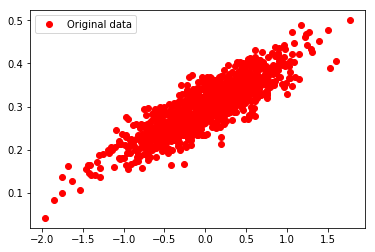

In [1]:
# 아래 코드를 실행해 주세요 
from sklearn.datasets import load_iris
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

num_points = 1000
vectors_set = []
for i in range(num_points):
    x1= np.random.normal(0.0, 0.55)
    y1= x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

xs = np.asarray([v[0] for v in vectors_set])
ys = np.asarray([v[1] for v in vectors_set])

plt.plot(xs, ys, 'ro', label='Original data')
plt.legend()
plt.show()

#### 답안지 입력란
* 아래에 답을 서술하여 주세요


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


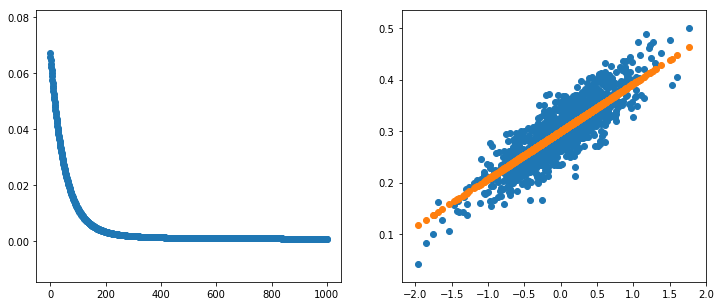

In [7]:
# 정답을 서술해 주세요!
#while문으로 할수는 없나?

w0 = np.random.normal(loc = 0.0, scale=0.1) #정규분포를 이용하여 가중치 초기화
w1 = np.random.normal(loc = 0.0, scale=0.1)

# 손실 함수값 계산하기
def calculate_MSE(w0, w1):
    y_pred = w1*xs+w0 # 가중치 조합을 통한 예측값
    return ((ys - y_pred)**2).mean() # MSE

# W0에 대한 미분식
def calculate_w0_derivative(w0,w1):
    return (w1*xs + w0 - ys).mean()

# W1에 대한 미분식
def calculate_w1_derivative(w0,w1):
    return ((w1*xs + w0 - ys)*xs).mean()

mse =  calculate_MSE(w0, w1)

# 갱신된 weight와 mse 저장
w0_history = [w0]
w1_history = [w1]
mse_history = [mse]
print(w0_history,w1_history,mse_history)

alpha = 0.01 # 학습률
epoch = 1000 # 몇 번 학습할지 결정

for i in range(epoch):
# while True:
    # 이전 가중치 가져오기
    old_w0 = w0_history[-1]
    old_w1 = w1_history[-1]
    
    # 미분값 갱신
    dw0 = calculate_w0_derivative(old_w0,old_w1)
    dw1 = calculate_w1_derivative(old_w0,old_w1)
    
    # 경사하강법을 통한 가중치 갱신
    new_w0 = old_w0 - alpha * dw0
    new_w1 = old_w1 - alpha * dw1
    new_mse = calculate_MSE(new_w0,new_w1)
    
    w0_history.append(new_w0)
    w1_history.append(new_w1)
    mse_history.append(new_mse)
    

len(range(epoch+1))
len(mse_history)

fig = plt.figure(figsize=(12, 5))
fig.add_subplot(121).scatter(list(range(epoch+1)), mse_history)  


fig.add_subplot(122).scatter(xs, ys)
fig.add_subplot(122).scatter(xs, w1_history[-1]*xs+w0_history[-1])
plt.show()


#### 정답 확인
* 아래와 같이 출력이 나오도록 해주세요

![Imgur](https://i.imgur.com/zEiW7zM.png)